In [1]:
import sys
sys.path.append('d:\\QUANT_GAME\\python_game\\factor\\factor_lab\\analyze_note')
from analyze_factor_note_init import AnalyzeFactorNotes as Note

---

### 初始化条件

In [2]:
factor_name = 'price_speed_change'
start_date = 20100101
end_date = 20210101
med_tf = False
z_score_tf = False
demean_tf = False
sample_num = None
sample_every_date_tf = False

In [3]:
note = Note(factor_name, start_date, end_date,
                med_tf, z_score_tf, demean_tf,
                sample_num,sample_every_date_tf
            )

#### 加载数据

In [4]:
note.load_data()

---

#### 查看因子相关信息

##### - 因子定义及计算公式

因子名称：加固速度变化因子（price_speed_change）   
因子定义： t时刻的价格速度变化   
$$
pricespeed_t = \frac{price_t - price_{t-1}}{price_{t-1}}
$$
$$
factor = pricespeed_t - pricespeed_{t-1}
$$

#### - 因子信息

In [5]:
factor_info = note.get_factor_info()
for k,v in factor_info.items():
    print(k,':',v)

name : price_speed_change
fields : ['close']
other_dIepend_factors : ['price_speed']
calc_params : {'v_period': 1, 'a_period': 1}
save_h5_path : F:\factor_lab_res\prepared_data\factor_data.h5
value_range : [-20.56568, 20.677103]
process_suggest_method : None


---

### 因子分析

In [6]:
note.get_data_for_analysis()

In [7]:
zy_fa = note.analysis_factor()

#### 绘制factor-return散点图

- 全部数据

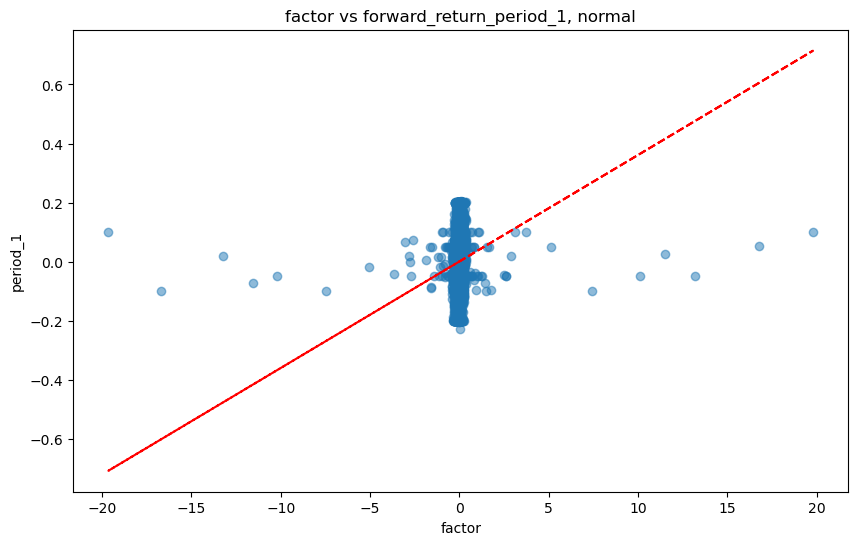

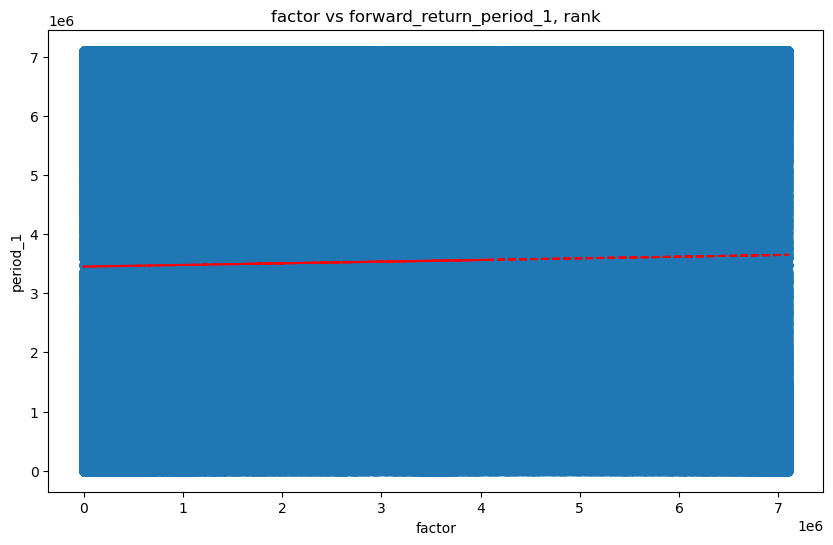

In [8]:
# normal
zy_fa.plot_scatter_and_regression(periods_list=[1,],sample_num=None)
# rank
zy_fa.plot_scatter_and_regression(periods_list=[1,],rank_tf=True,sample_num=None)

- 抽样100000

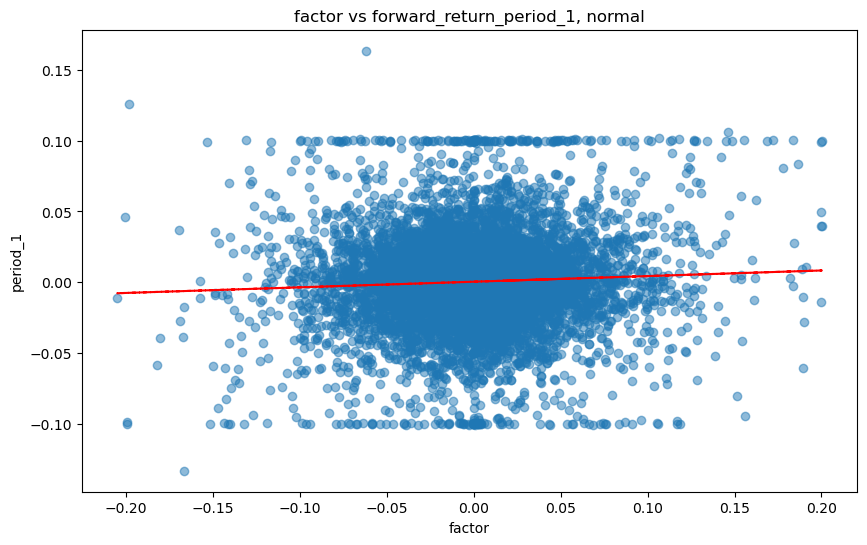

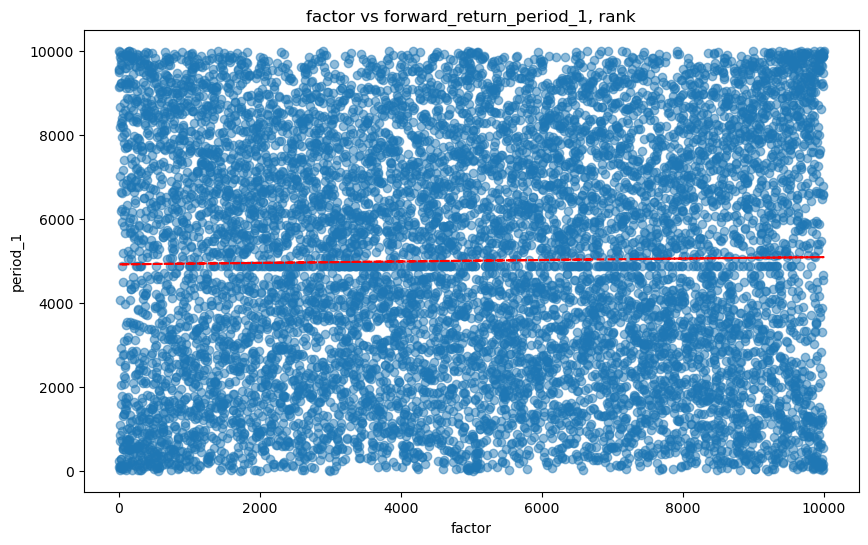

In [9]:
# normal
zy_fa.plot_scatter_and_regression(periods_list=[1,],sample_num=10000)
# rank
zy_fa.plot_scatter_and_regression(periods_list=[1,],rank_tf=True,sample_num=10000)

### 绘制因子分布图

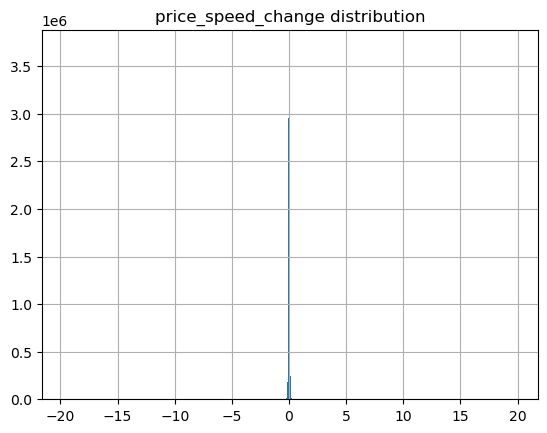

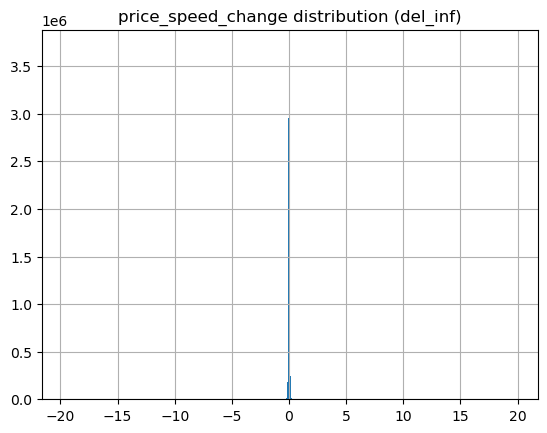

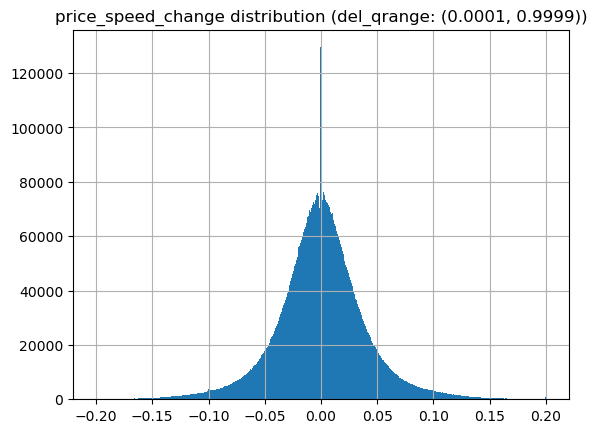

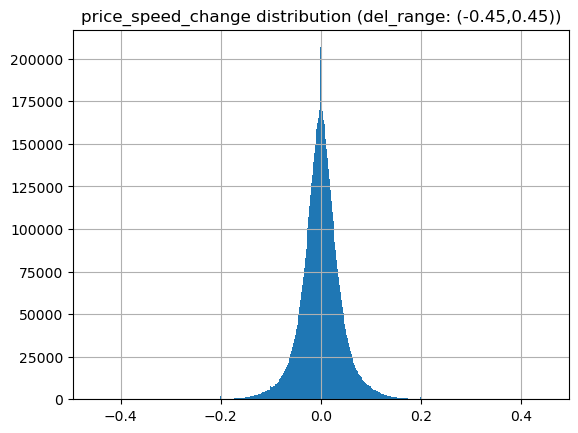

In [10]:
# 原始因子分布图
zy_fa.plot_factor_hist()
# 剔除inf后的因子分布图
zy_fa.plot_factor_hist(del_inf=True)
# 截取分位数qrange的因子分布图
zy_fa.plot_factor_hist(del_qrange=(0.0001,0.9999))
# 截取给定range的因子分布图
zy_fa.plot_factor_hist(del_range=(-0.45,0.45))

---

#### IC

#### 打印因子ic分析结果

In [11]:
analyze_ic_res = zy_fa.analyze_ic_res()
print('analyze_ic_res:\n',analyze_ic_res)


analyze_ic_res:
               period_1  period_2  period_3  period_5  period_8 period_13  \
norm_ic_mean  0.046695  0.028784  0.024544  0.019363  0.013275  0.011261   
norm_ic_std   0.102126  0.098763  0.098017  0.094386   0.08542  0.081109   
norm_ir       0.457225  0.291444  0.250401  0.205148  0.155413  0.138839   
norm_abs_ic   0.054045  0.031148  0.027473  0.024385  0.016495  0.016665   
rank_ic_mean  0.014344  0.001571  0.001908  -0.00015 -0.003125 -0.001436   
rank_ic_std   0.119813  0.113778   0.11249  0.109545   0.10061  0.097338   
rank_ir       0.119718  0.013812  0.016964  -0.00137 -0.031063 -0.014757   
rank_abs_ic    0.02801  0.007794  0.014837  0.012614  0.003074  0.006796   

             period_21 period_34 period_55 period_89 period_144 period_233  \
norm_ic_mean   0.00864  0.006355  0.005225  0.004089   0.003332   0.002606   
norm_ic_std   0.075947  0.071225  0.065966  0.060862   0.058177   0.055991   
norm_ir       0.113766  0.089222  0.079211  0.067185   0.057277 

---

#### 绘制norm_ic的时序图

<Figure size 640x480 with 0 Axes>

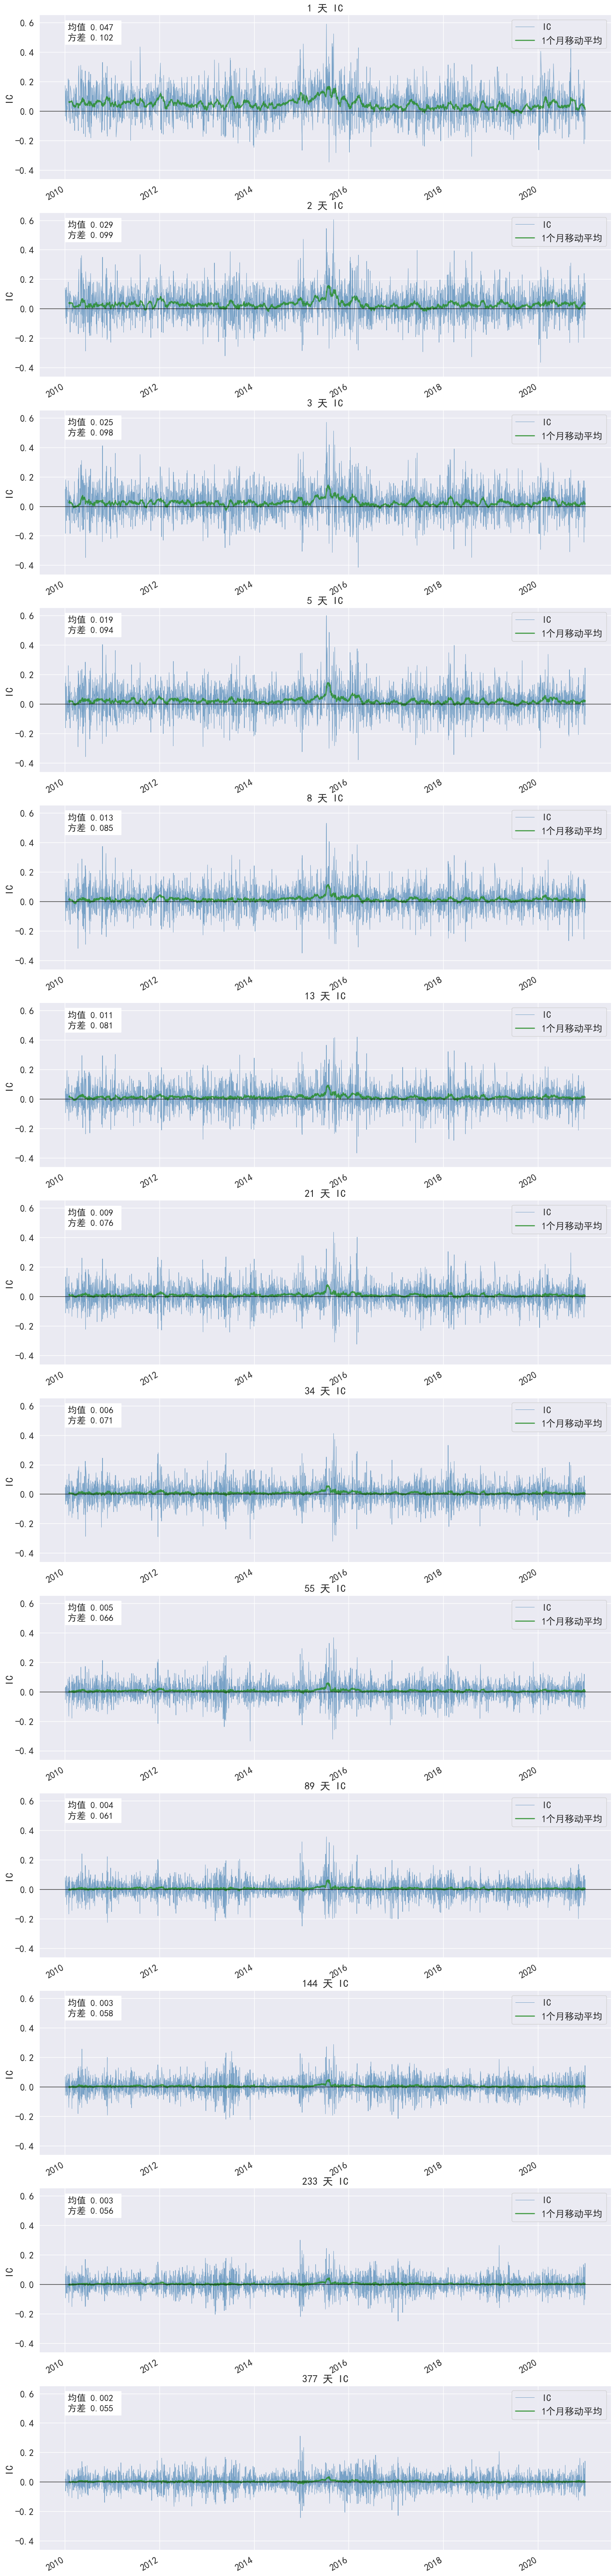

In [12]:
zy_fa.plot_norm_ic_ts()

---

#### 绘制rank_ic的时序图

<Figure size 640x480 with 0 Axes>

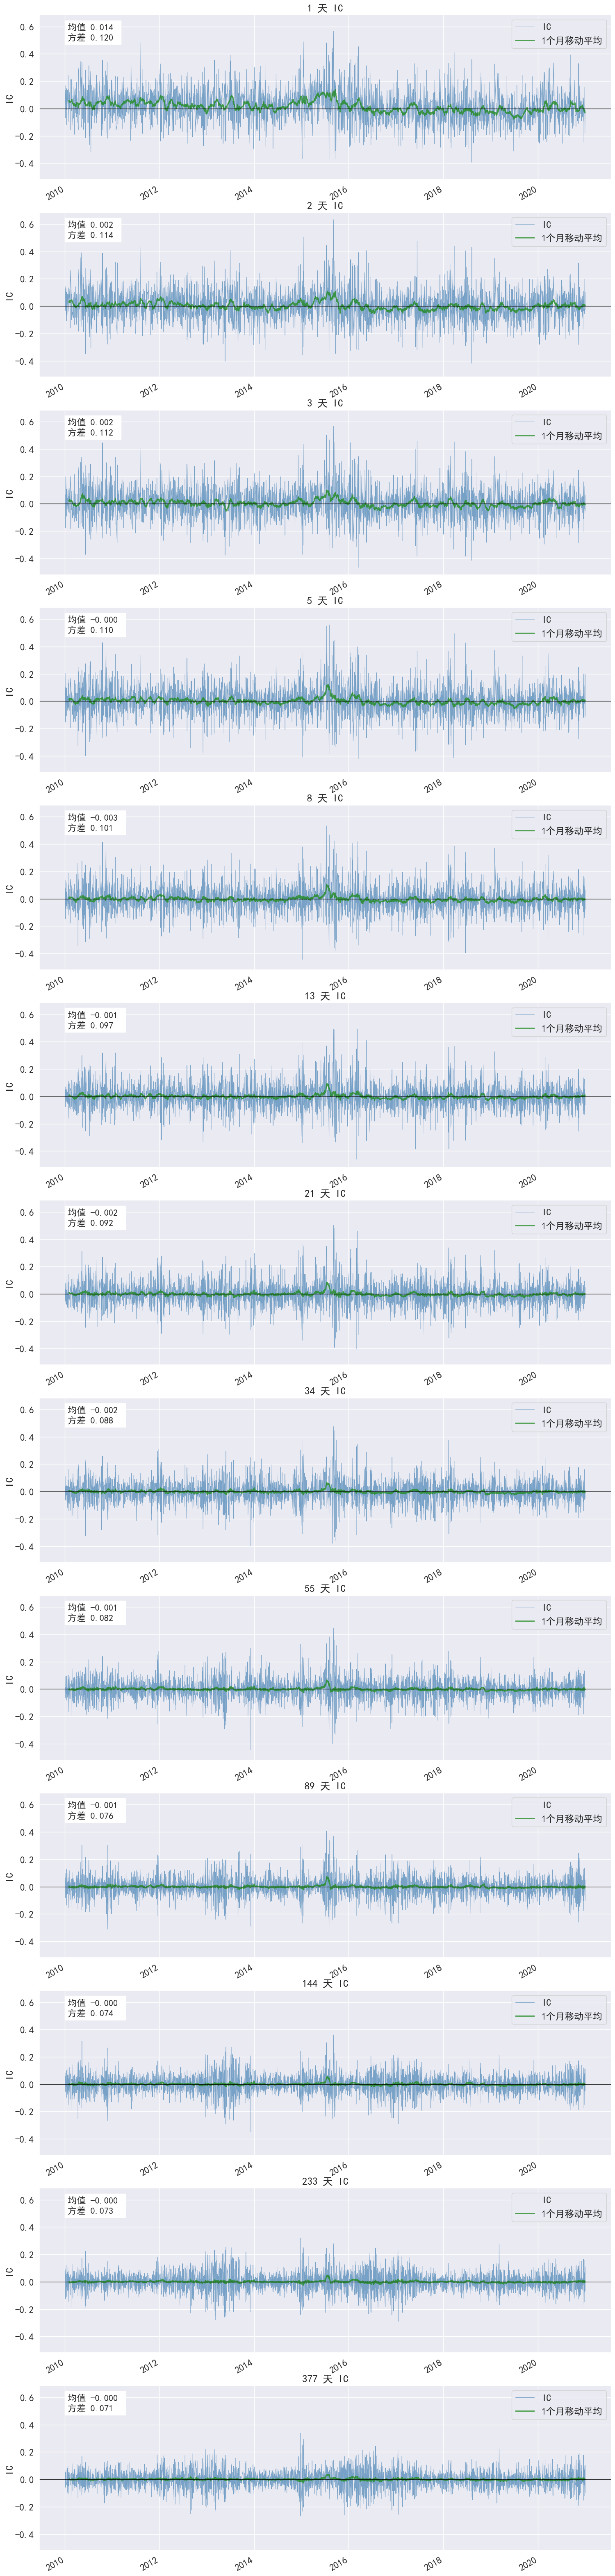

In [13]:
zy_fa.plot_rank_ic_ts()